## Exercise 1 - integration of infinite intervals

Calculate the value of the following integral using Gaussian quadrature: $$I=\int_0^\infty e^{-t^2}dt$$ The value of this integral is known analytically: $I=\frac{1}{2}\sqrt{\pi}=0.886226925453\ldots$.  

To solve the integral numerically, make the change of variables $z=t/(1+t)$. The integral becomes $$I=\int_0^1 \frac{e^{-z^2/(1-z)^2}}{(1-z)^2}dz .$$ 

1. Plot the functions $ f(x)=e^{-t^2} $ and $i(z)=\frac{e^{-z^2/(1-z)^2}}{(1-z)^2}$.
2. Change your Gauss-Legendre integration program from last week to solve this integral. 
3. Plot the value of the integral and/or the integration error as a function of integration points.

## Talking points

1. What do you observe?
2. How many points do you need for 0.1% accuracy and how many for $10^{-6}$% accuracy? 

## Exercise 1.1a

Plot the function $ f(x)=e^{-t^2}$.

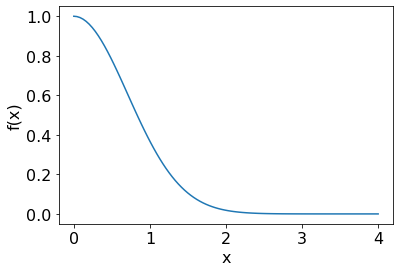

In [2]:
from numpy import linspace,exp
import matplotlib.pyplot as plt 

# start and end points
a = 0.0
b = 4.0
points = 100

# Set up lists for plotting
y = []
x = linspace(a,b,points)

# generate the function values
for xi in x:
    val = exp(-xi**2)
    y.append(val)

# Make the graph
plt.rc('font',size=16) # set the font size
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

## Exercise 1.1b

Plot the function $i(z)=\frac{e^{-z^2/(1-z)^2}}{(1-z)^2}$.

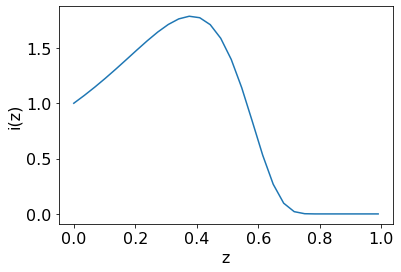

In [4]:
from numpy import linspace,exp
import matplotlib.pyplot as plt 

# start and end points
a = 0.0
b = 0.99
points = 30

# Set up lists for plotting
y = []
x = linspace(a,b,points)

# generate the function values
for xi in x:
    denom = (1.0-xi)**2
    val = exp(-(xi**2)/denom)/denom
    y.append(val)

# Make the graph
plt.rc('font',size=16) # set the font size
plt.plot(x,y)
plt.xlabel('z')
plt.ylabel('i(z)')

plt.show()

## Exercise 1.2 

Change your Gauss-Legendre integration program from last week to solve this integral. Plot the value of the integral and/or the integration error as a function of integration points.


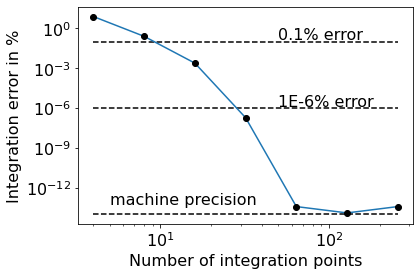

In [28]:
from numpy import linspace,exp,sqrt,pi
from gaussxw import gaussxwab
import matplotlib.pyplot as plt 

# define function, bounds and value of integral
def f(z):
    return exp(-z**2/(1-z)**2)/(1-z)**2
a = 0.0
b = 1.0
val = 0.5*sqrt(pi)

# Set up lists for plotting
y = []
x = []
err1 = 0.1
err2 = 1E-6

# define settings for convergence loop
factor = 2
initial = 2
increments = 8

# convergence loop
N = initial
for i in range(1,increments):
    N = N*factor
    z,w = gaussxwab(N,a,b)
    s = 0.0
    for k in range(N):
        s += w[k]*f(z[k])
    error = abs((val-s)/val*100) # compute error
    y.append(error)
    x.append(N)

# Make the graph
plt.rc('font',size=16) # set the font size
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.plot(x,y,"ko")
plt.xlabel('Number of integration points')
plt.ylabel('Integration error in %')
plt.hlines(err1,x[0],x[increments-2],linestyles='dashed',colors='k')
plt.hlines(err2,x[0],x[increments-2],linestyles='dashed',colors='k')
plt.hlines(1E-14,x[0],x[increments-2],linestyles='dashed',colors='k')
plt.text(50, err1+4E-2, '0.1% error')
plt.text(50, err2+4E-7, '1E-6% error')
plt.text(5, 1E-14+4E-14, 'machine precision')


plt.show()

## Exercise 2 - multi dimensional integrals

Calculate the double integral $\DeclareMathOperator\erf{erf} \int_{-1}^1\int_{-1}^1 e^{(-x^2-y^2)} dx dy = \pi \erf(1)^2$ numerically. 

1. Plot the functions $ e^{(-x^2-y^2)}$.
2. Adapt your Gauss-Legendre integration program to solve this integral. 
3. Plot the value of the integral and/or the integration error as a function of integration points.

## Talking points

1. What do you observe?
2. How many points do you need for 0.1% accuracy and how many for $10^{-6}$% accuracy?


## Exercise 2.1

Plot the functions $ e^{(-x^2-y^2)}$.

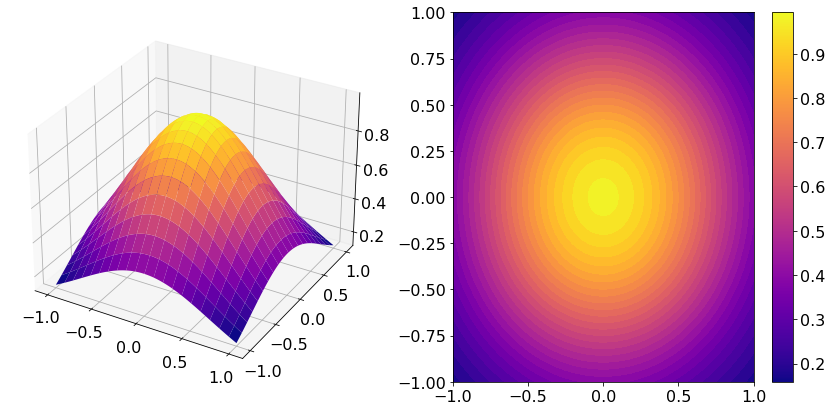

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

f = lambda x,y: exp(-x**2-y**2)

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1,projection='3d')

xvalues = np.linspace(-1,1,100)
yvalues = np.linspace(-1,1,100)
xgrid, ygrid = np.meshgrid(xvalues, yvalues)
zvalues = f(xgrid, ygrid)

surf = ax.plot_surface(xgrid, ygrid, zvalues, rstride=5, cstride=5, linewidth=0, cmap=cm.plasma)

ax = fig.add_subplot(1,2,2)

plt.contourf(xgrid, ygrid, zvalues, 30, cmap=cm.plasma)
fig.colorbar(surf, aspect=18)
plt.tight_layout()

None

## Exercise 2.2

Adapt your Gauss-Legendre integration program to solve the integral $ \int_{-1}^1 \int_{-1}^1 e^{(-x^2-y^2)} dx dy$.  Plot the value of the integral and/or the integration error as a function of integration points.

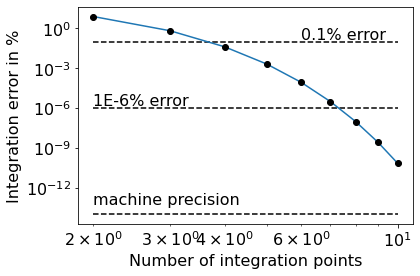

In [24]:
from numpy import linspace,exp,sqrt,pi
from math import erf
from gaussxw import gaussxwab
import matplotlib.pyplot as plt 

# define function, bounds and value of integral
def f(x,y):
    return exp(-x**2-y**2)
ax = -1.0
bx = 1.0
ay = -1.0
by = 1.0

val = pi*erf(1)**2

# print('val: ',val)

# Set up lists for plotting
y = []
x = []
err1 = 0.1
err2 = 1E-6

# define settings for convergence loop
factor = 1
initial = 1
increments = 10

# convergence loop
N = initial
for i in range(1,increments):
    N = N+factor
    zx,wx = gaussxwab(N,ax,bx)
    zy,wy = gaussxwab(N,ay,by)
    s = 0.0
    for k in range(N): # x integration
        for j in range(N): # y integration
            s += wx[k]*wy[j]*f(zx[k],zy[j])
    error = abs((val-s)/val*100) # compute error
    # print('N: ',N,' integral: ',s,' error: ',error)
    y.append(error)
    x.append(N)

# Make the graph
plt.rc('font',size=16) # set the font size
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.plot(x,y,"ko")
plt.xlabel('Number of integration points')
plt.ylabel('Integration error in %')
plt.hlines(err1,x[0],x[increments-2],linestyles='dashed',colors='k')
plt.hlines(err2,x[0],x[increments-2],linestyles='dashed',colors='k')
plt.hlines(1E-14,x[0],x[increments-2],linestyles='dashed',colors='k')
plt.text(6, err1+4E-2, '0.1% error')
plt.text(2, err2+5E-7, '1E-6% error')
plt.text(2, 1E-14+4E-14, 'machine precision')


plt.show()

## Exercise 3 - numeric differentiation

Calculate the derivative of $f(x)=x^3-2x^2+x-1$ numerically with the forward $\left( \frac{df}{dx} \approx \frac{f(x+h)-f(x)}{h}\right)$ or the backward difference $\left( \frac{df}{dx} \approx \frac{f(x)-f(x-h)}{h} \right)$ method. 

1. Use the forward and backward difference rule to calculate $f'(x)$ for $h=0.1$ and $h=0.01$.
2. Plot the analytic derivative and your numeric derivatives in the same graph. 
3. Plot the difference between the analytic and the numeric derivatives.

## Talking points

1. What do you observe?
2. How does the error in the numeric derivatives behave with $x$ and $h$?
3. How can we do better?


## Exercise 3.1 and 3.2

Calculate the derivative of $f(x)=x^3-2x^2+x-1$ numerically. Use the forward and backward difference rule to calculate $f'(x)$ for $h=0.1$ and $h=0.01$. Plot the analytic derivative and your numeric derivatives in the same graph. 

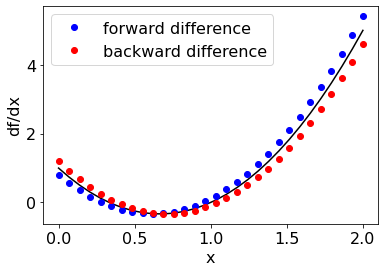

In [56]:
from numpy import linspace
import matplotlib.pyplot as plt 

# define function, bounds and value of integral
def f(x):
    return x**3-2*x**2+x-1
def g(x):
    return 3*x**2-4*x+1

a = 0.0
b = 2.0
points = 30
h = 0.1

# Set up lists for plotting
y = []
x = linspace(a,b,points)
fda = []
bda = []

# generate the function values
for xi in x:    
    fd = (f(xi+h)-f(xi))/h
    fda.append(fd)
    bd = (f(xi)-f(xi-h))/h
    bda.append(bd)
    y.append(g(xi))

# Make the graph
plt.rc('font',size=16) # set the font size
plt.plot(x,y,"k")
plt.plot(x,fda,"bo",label='forward difference')
plt.plot(x,bda,"ro",label='backward difference')
plt.xlabel('x')
plt.ylabel('df/dx')
plt.legend(loc="upper left")

plt.show()

## Exercise 3.3 

Plot the difference between the analytic and the numeric derivatives.

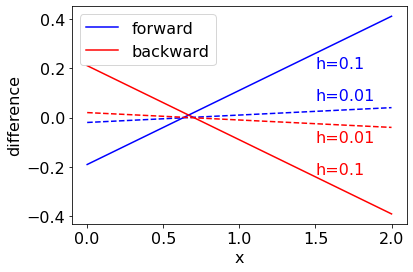

In [65]:
from numpy import linspace
import matplotlib.pyplot as plt 

# define function, bounds and value of integral
def f(x):
    return x**3-2*x**2+x-1
def g(x):
    return 3*x**2-4*x+1

a = 0.0
b = 2.0
points = 30
h1 = 0.1
h2 = 0.01

# Set up lists for plotting
y = []
x = linspace(a,b,points)
fda1 = []
bda1 = []
fda2 = []
bda2 = []

# generate the function values
for xi in x:    
    fd = (f(xi+h1)-f(xi))/h1
    fda1.append(fd-g(xi))
    fd = (f(xi+h2)-f(xi))/h2
    fda2.append(fd-g(xi))
    bd = (f(xi)-f(xi-h1))/h1
    bda1.append(bd-g(xi))
    bd = (f(xi)-f(xi-h2))/h2
    bda2.append(bd-g(xi))
    y.append(g(xi))

# Make the graph
plt.rc('font',size=16) # set the font size
#plt.plot(x,y,"k")
plt.plot(x,fda1,"b-",label='forward')
plt.plot(x,bda1,"r-",label='backward')
plt.plot(x,fda2,"b--")
plt.plot(x,bda2,"r--")
plt.xlabel('x')
plt.ylabel('difference')
plt.legend(loc="upper left")
plt.text(1.5,0.2,'h=0.1',color="blue")
plt.text(1.5,0.07,'h=0.01',color="blue")
plt.text(1.5,-0.23,'h=0.1',color="red")
plt.text(1.5,-0.1,'h=0.01',color="red")

plt.show()

## Exercise 4 - central difference method

Calculate the derivative of $f(x)=x^3-2x^2+x-1$ numerically with the central difference $\left( \frac{df}{dx}\approx\frac{f((x+h/2)-f(x-h/2)}{h}\right) $ method.  

1. Use the central difference rule to calculate $f'(x)$ for $h=0.1$ and $h=0.01$.
2. Plot the analytic and your numeric derivative in the same graph. 
3. Plot the difference between the analytic and the numeric derivative.

## Talking points

1. What do you observe?
2. How does the error in the numeric derivatives now behave with $x$ and $h$?

## Exercise 4.1 and 4.2

Use the central difference rule to calculate $f'(x)$ for $h=0.1$ and $h=0.01$. Plot the analytic and your numeric derivative in the same graph.

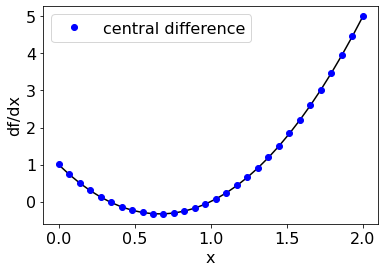

In [67]:
from numpy import linspace
import matplotlib.pyplot as plt 

# define function, bounds and value of integral
def f(x):
    return x**3-2*x**2+x-1
def g(x):
    return 3*x**2-4*x+1

a = 0.0
b = 2.0
points = 30
h = 0.1

# Set up lists for plotting
y = []
x = linspace(a,b,points)
cda = []

# generate the function values
for xi in x:    
    cd = (f(xi+0.5*h)-f(xi-0.5*h))/h
    cda.append(cd)
    y.append(g(xi))

# Make the graph
plt.rc('font',size=16) # set the font size
plt.plot(x,y,"k")
plt.plot(x,cda,"bo",label='central difference')
plt.xlabel('x')
plt.ylabel('df/dx')
plt.legend(loc="upper left")

plt.show()

## Exercise 4.3

Plot the difference between the analytic and the numeric derivative.

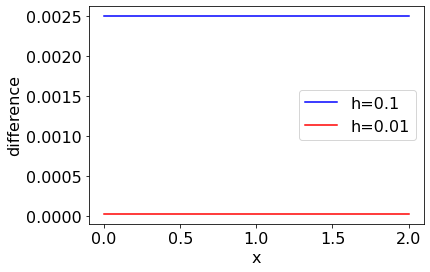

In [71]:
from numpy import linspace
import matplotlib.pyplot as plt 

# define function, bounds and value of integral
def f(x):
    return x**3-2*x**2+x-1
def g(x):
    return 3*x**2-4*x+1

a = 0.0
b = 2.0
points = 30
h1 = 0.1
h2 = 0.01

# Set up lists for plotting
y = []
x = linspace(a,b,points)
cda1 = []
cda2 = []

# generate the function values
for xi in x:    
    cd = (f(xi+0.5*h1)-f(xi-0.5*h1))/h1
    cda1.append(cd-g(xi))
    cd = (f(xi+0.5*h2)-f(xi-0.5*h2))/h2
    cda2.append(cd-g(xi))
    y.append(g(xi))

# Make the graph
plt.rc('font',size=16) # set the font size
#plt.plot(x,y,"k")
plt.plot(x,cda1,"b-",label='h=0.1')
plt.plot(x,cda2,"r-",label='h=0.01')
plt.xlabel('x')
plt.ylabel('difference')
plt.legend(loc="best")

plt.show()